# BHARAT INTERN


**KENIL SACHAPARA**

**Task 1: Stock Market Prediction Using  LSTM**

Dataset: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(dataset_link)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [2]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
df.shape

(2035, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
# Check missing values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
new_df=pd.read_csv(dataset_link,parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Sorting Data**

In [11]:
new_df['Date'] = pd.to_datetime(new_df['Date'], errors='coerce')
print(type(new_df.Date[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
new_df.sort_values(by=['Date'],inplace=True,ascending=True)
new_df.Date.head()

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

**Data Visualization**

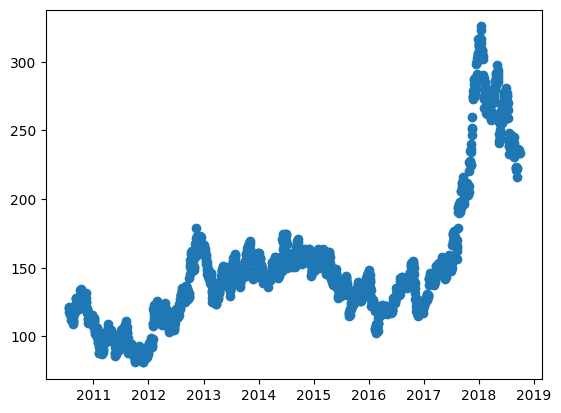

In [13]:

fig,ax=plt.subplots()
ax.scatter(new_df.Date,new_df.Close) 

In [14]:
new_df.reset_index(inplace=True)
new_df


,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


**Univariate analysis of Closing Price**

In [15]:
close_df=new_df['Close']
close_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [17]:
close_df.size

2035

In [18]:
close_df.shape

(2035,)

In [19]:
close_df.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

**Min Max Scaler**

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**Train and Test Split**

In [17]:
training_size=int(len(close_df)*0.7)
test_size=len(close_df)-training_size
train_data,test_data=close_df[0:training_size,:],close_df[training_size:len(close_df),:1]

In [18]:
train_data.shape,close_df.shape

((1424, 1), (2035, 1))

In [19]:
test_data.shape

(611, 1)

In [20]:
type(test_data)

numpy.ndarray

**Data Preprocessing**

In [21]:
import numpy as np
def create_dataset(dataset, time_step=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)#reshaping into tuples
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
y_train.shape

(1323,)

In [82]:
X_train.shape

(1323, 100, 1)

In [83]:

print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [84]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

**Creating the stacked LSTM Model**

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))#input layer with 50 neurons
model.add(LSTM(50,return_sequences=True)) #hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))#output layer
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
https://github.com/Kumarinishu/LGMVIP-DataScience-Nishu/blob/main/Beginner/TASK-2/Stock%20Market%20Prediction%20And%20Forecasting%20Using%20Stacked%20LSTM.ipynb

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs =100, batch_size = 64, verbose = 1);

Epoch 1/100
21/21 [==============================] - 24s 673ms/step - loss: 0.0082 - val_loss: 0.0093
Epoch 2/100
21/21 [==============================] - 11s 521ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 3/100
21/21 [==============================] - 10s 498ms/step - loss: 9.8420e-04 - val_loss: 0.0037
Epoch 4/100
21/21 [==============================] - 10s 506ms/step - loss: 8.7098e-04 - val_loss: 0.0043
Epoch 5/100
21/21 [==============================] - 10s 463ms/step - loss: 8.6032e-04 - val_loss: 0.0032
Epoch 6/100
21/21 [==============================] - 10s 489ms/step - loss: 8.1232e-04 - val_loss: 0.0031
Epoch 7/100
21/21 [==============================] - 10s 489ms/step - loss: 7.7894e-04 - val_loss: 0.0027
Epoch 8/100
21/21 [==============================] - 10s 492ms/step - loss: 7.8950e-04 - val_loss: 0.0035
Epoch 9/100
21/21 [==============================] - 9s 410ms/step - loss: 7.1330e-04 - val_loss: 0.0024
Epoch 10/100
21/21 [==============================] - 1

**evaluation of constructed LSTM model**

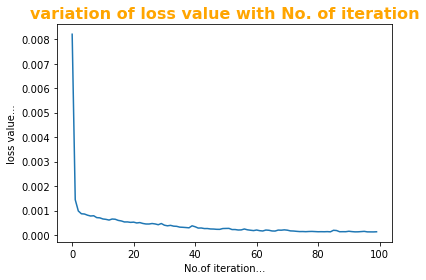

In [63]:
#ploting loss of our trained model
loss=model.history.history['loss']
plt.plot(loss)
plt.xlabel("No.of iteration...")
plt.ylabel("loss value...")
plt.title("variation of loss value with No. of iteration",color="orange",fontsize=16,fontweight="bold");

The above graph shows that loss has been decreased significantly with the increase in iteration,thus model is well trained


**Evaluation of our constructed model on train and test data**

In [67]:
train_predict1=model.predict(X_train)


42/42 [==============================] - 5s 112ms/step


In [71]:

test_predict1=model.predict(X_test)

16/16 [==============================] - 1s 93ms/step


In [73]:

#Transformback to original form
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

In [75]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict1))

134.3415241858397

In [90]:
math.sqrt(mean_squared_error(ytest,test_predict1))

208.41858669034988

In [91]:
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [92]:
train_predict1.shape

(1323, 1)

**Plotting**

In [94]:

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df)-1, :] = test_predict1



Text(0, 0.5, 'closing price')

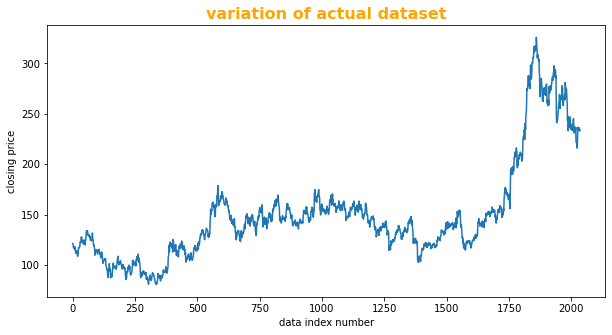

In [97]:
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_df))
plt.title("variation of actual dataset",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

Text(0, 0.5, 'closing price')

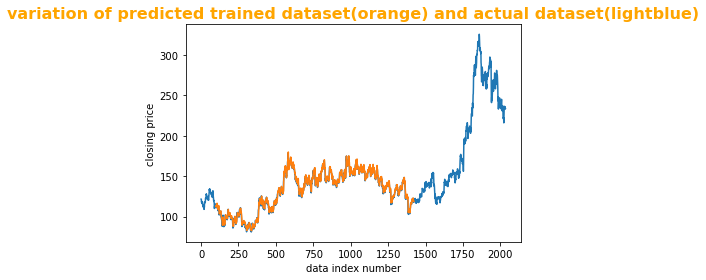

In [98]:
#plot of predictions on closing price made by our model on training dataset vs actual closing price
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted trained dataset(orange) and actual dataset(lightblue)",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

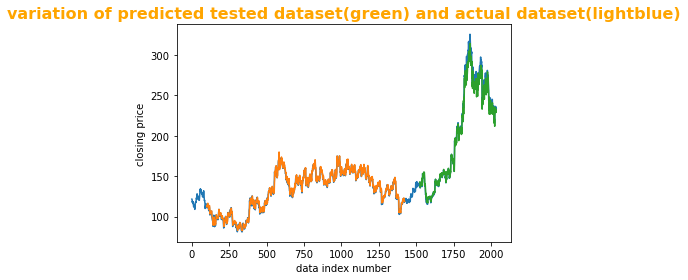

In [100]:
#plot of prediction on closing price made by our model on training dataset vs actual closing price
#vs prediction on closing price made by our model on test dataset
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted tested dataset(green) and actual dataset(lightblue)",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")
plt.plot(testPredictPlot)
plt.show()

**since our model trained with first 100 data inputs and start predicting from 101 onwards
so orange starts from 101 dataindex no. , similar logic for test data**


light blue=-actual closing price


orange=prediction on closing price made by our model on training dataset


green=prediction on closing price made by model on test dataset